In [320]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster, datasets, metrics
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler
from array import array
from keras.utils import to_categorical
from keras.utils import np_utils
from sklearn import preprocessing
#from sklearn.mixture import GMM
#from learning_model import *
#from sklearn.cross_validation import train_test_split
#from data_handle import * 

        x        y   pci        rsrp        dis
0  6.9745  14.5660  3700 -111.464000  17.438928
1  7.0255  16.5805  3900 -124.574074  61.320984
2  7.0330  12.1930  3900 -118.212500  61.183143
3  8.7550  14.6395  3900 -119.633333  59.496108
4  8.8030  16.5355  3700 -125.670370  15.926383


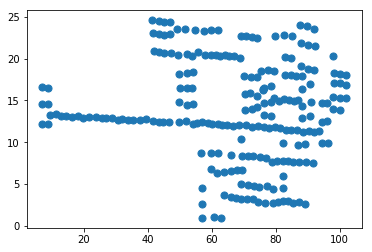

In [372]:
rem_pci_all = pd.read_csv("rsrp_set33.csv")
#rem_pci_all = pd.read_csv("rem_pci_train_pd.csv")
#rem_pci = pd.read_csv("rem_rsrp_train_pd.csv")
#rem_test = pd.read_csv("rem_test_pd.csv")
#rem_pci_np = np.genfromtxt('rem_pci_train.csv', delimiter=',')
#rem_rsrp = pd.read_csv("rem_rsrp_train.csv")
print(rem_pci_all.head())
plt.scatter(rem_pci_all['x'], rem_pci_all['y'], s=50);

In [373]:
#rem_pci_all = preprocessing.scale(rem_pci_all)
#print (rem_pci_all)
#np.savetxt('normalize.csv', rem_pci_all, delimiter=',', fmt='%f')

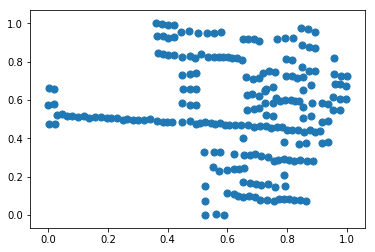

In [374]:
#print (rem_pci_all)
#print (type(rem_pci_all))
#print(rem_pci_all)
rem_pci_all.insert(5,"pci_37",0)
rem_pci_all.insert(6,"pci_38",0) 
rem_pci_all.insert(7,"pci_39",0) 
rem_pci_all.insert(8,"pci_40",0)
rem_pci_all.insert(9,"pci_41",0) 
rem_pci_all.insert(10,"pci_42",0) 


for i in range(0,len(rem_pci_all)):
    if rem_pci_all.iloc[i,2] == 3700:
        rem_pci_all.iloc[i,5] = "1"
    if rem_pci_all.iloc[i,2] == 3800:
        rem_pci_all.iloc[i,6] = "1"
    if rem_pci_all.iloc[i,2] == 3900:
        rem_pci_all.iloc[i,7] = "1"
    if rem_pci_all.iloc[i,2] == 4000:
        rem_pci_all.iloc[i,8] = "1"
    if rem_pci_all.iloc[i,2] == 4100:
        rem_pci_all.iloc[i,9] = "1"
    if rem_pci_all.iloc[i,2] == 4200:
        rem_pci_all.iloc[i,10] = "1"
#print(rem_pci_all)
#print("==========")
rem_pci_all = rem_pci_all[['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci']]
rem_pci_all_copy = rem_pci_all
rem_pci_all_cut = rem_pci_all.drop(['pci'], axis=1)

#print(rem_pci_all)
#print("===")  
rem_pci_all=rem_pci_all_cut.values
#print (type(rem_pci_all))
#print (rem_pci_all)
#:::Normalize[0,1]
#print(rem_pci_all_cut)
min_max_scaler = preprocessing.MinMaxScaler()
rem_pci_all_n = min_max_scaler.fit_transform(rem_pci_all_cut)
#:::Normalize[-1,1]
  #max_abs_scaler = preprocessing.MaxAbsScaler()
  #rem_pci_all_n = max_abs_scaler.fit_transform(rem_pci_all_cut)
#:::Standardisation
#print(rem_pci_all_cut)
#rem_pci_all_n = preprocessing.scale(rem_pci_all_cut)
#print(rem_pci_all_n.mean(axis=0))
#print(rem_pci_all_n.std(axis=0))
#print(rem_pci_all_n)
#print("===")  
rem_pci_all_n_pd = pd.DataFrame(rem_pci_all_n,columns = ['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'])
#print(rem_pci_all_n_pd)
for i in range(0,len(rem_pci_all_n_pd)):
    if rem_pci_all_n_pd.iloc[i,4] == 1:
        rem_pci_all_n_pd.iloc[i,4] = "1"
    if rem_pci_all_n_pd.iloc[i,5] == 1:
        rem_pci_all_n_pd.iloc[i,5] = "1"
    if rem_pci_all_n_pd.iloc[i,6] == 1:
        rem_pci_all_n_pd.iloc[i,6] = "1"
    if rem_pci_all_n_pd.iloc[i,7] == 1:
        rem_pci_all_n_pd.iloc[i,7] = "1"
    if rem_pci_all_n_pd.iloc[i,8] == 1:
        rem_pci_all_n_pd.iloc[i,8] = "1"
    if rem_pci_all_n_pd.iloc[i,9] == 1:
        rem_pci_all_n_pd.iloc[i,9] = "1"
#print (rem_pci_all_n_pd)
plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50);


In [375]:
def group(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y','pci']).apply(pd.DataFrame.mode)
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

In [376]:
def group_pcimap(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_median = rem_pci.groupby(['x','y']).median()
    group_drift = rem_pci.groupby(['x','y']).transform(lambda x: x - x.mean())
    return group_median,group_drift

[[6 2 2 2 6 6 2 5 5 5 5 5 0 3 3 0 0 5 5 5 1 6 1 1 5 6 5 5 5 1 5 5 1 5 5 0
  0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 3 0 0 3 3 5 0 6 6 1 0 1 5 5 0 3 5 5 5 1
  0 5 5 5 3 0 1 1 5 3 0 5 1 4 1 0 3 3 4 1 0 3 4 5 5 5 5 4 3 3 5 0 0 4 5 0
  0 3]
 [0 5 0 3 3 0 3 0 0 0 0 0 0 3 3 0 3 0 3 3 0 3 3 0 0 0 3 3 3 3 3 0 0 0 3 4
  3 3 0 5 4 3 5 0 3 0 5 4 4 4 4 3 5 5 4 0 4 4 4 1 5 4 3 3 0 4 5 1 3 3 4 3
  3 3 3 0 0 5 5 0 3 0 0 0 3 3 5 0 0 0 0 5 1 6 5 5 5 5 5 0 3 3 3 3 1 3 3 3
  3 4]]
-0.09474217211666583


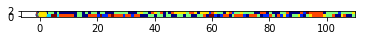

In [383]:
#print(rem_pci_all_n_pd)
group_median,group_drift = group_pcimap(rem_pci_all_n_pd)
#rsrp,group_drift = group(rem_rsrp)
#print("rem_rsrp==",rsrp)
#rem_rsrp.to_csv("rsrp.csv")
#group_median,group_drift = group(rem_test)
kmeans = KMeans(n_clusters=7)
#np.savetxt('group_median.csv', group_median, delimiter=',', fmt='%f')
#group_median = pd.read_csv("group_median.csv")
#print(rem_pci['pci'])

kmeans_fit = kmeans.fit(group_median)
y_kmeans = kmeans.predict(group_median)
#print(y_kmeans)
#print(y_kmeans.shape)


#print(y_kmeans_pd)

#add_kmeans = pd.merge(rem_pci,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans.to_csv('add_kmeans.csv')
#print(group_median)
rem_pci_all_pd = pd.DataFrame(rem_pci_all_copy,columns=['x','y','rsrp','dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42','pci'])
#print(type(rem_pci_all_pd))
#print(type(add_kmeans))

#print(rem_pci_all_pd)

plt.scatter(rem_pci_all_n_pd['x'], rem_pci_all_n_pd['y'], s=50, c=y_kmeans, cmap='jet');
y_kmeans_pd = pd.DataFrame({'zone':y_kmeans})
add_kmeans = pd.merge(rem_pci_all_pd,y_kmeans_pd, left_index=True, right_index=True)
#print(add_kmeans)
#add_kmeans = pd.merge(rem_pci_all_pd['pci'],add_kmeans, left_index=True, right_index=True)
add_kmeans['zone'].replace(6,7,inplace=True)
add_kmeans['zone'].replace(5,6,inplace=True)
add_kmeans['zone'].replace(4,5,inplace=True)
add_kmeans['zone'].replace(3,4,inplace=True)
add_kmeans['zone'].replace(2,3,inplace=True)
add_kmeans['zone'].replace(1,2,inplace=True)
add_kmeans['zone'].replace(0,1,inplace=True)
add_kmeans['pci'] = add_kmeans['pci'].map(lambda x:int(x/100))

add_kmeans.to_csv('aaa.csv')
add_kmeans.values[:,:]
add_kmeans = add_kmeans.drop(['dis','pci_37','pci_38','pci_39','pci_40','pci_41','pci_42'], axis=1)
add_kmeans = add_kmeans[['x','y','pci','rsrp','zone']]
add_kmeans = add_kmeans.values
#print(add_kmeans)
np.savetxt('set33_part_train.csv', add_kmeans, delimiter=',', fmt='%s')
#y_kmeans = np.reshape(y_kmeans, (27, 105))
#np.savetxt('y_kmeans.csv', y_kmeans, delimiter=',', fmt='%f')
cluster_labels = kmeans_fit.labels_
silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
print(silhouette_avg)


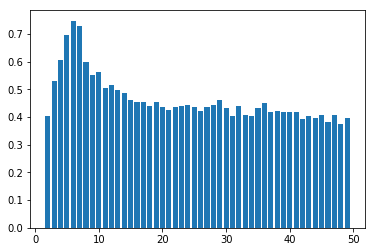

[0.405456868720069, 0.5298373435148543, 0.6078932230237639, 0.6960099028743887, 0.7480749374065304, 0.727914236651983, 0.598246591835839, 0.5537243383951299, 0.5621213614771731, 0.5041199687757473, 0.5144082829073632, 0.4970764479119845, 0.4876180384305801, 0.4633481682539292, 0.4528534953240712, 0.4552557103855641, 0.44080231487716165, 0.45427907919569904, 0.4346964384318976, 0.42621929150146515, 0.43592955480389456, 0.4410642819592355, 0.4439737053305473, 0.4356785802358129, 0.4216287933194607, 0.43756768861346756, 0.44200615658186665, 0.46025591640768027, 0.4343332379406901, 0.4039443753721702, 0.4404355956918329, 0.4063719226523537, 0.4027429408955858, 0.43178204180522023, 0.4490279848650822, 0.41730035671862714, 0.4223418649442051, 0.41852650670621794, 0.418504601119668, 0.4186384336007412, 0.3914022516629678, 0.4022544204817809, 0.39649012502191283, 0.40609604139066374, 0.3837867741178415, 0.40725426309763463, 0.37594795060621466, 0.39640469131965805]


In [378]:
# 迴圈
silhouette_avgs = []
ks = range(2, 50)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_pci_all_n_pd)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_pci_all_n_pd, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [328]:
def group_twice(rem_pci):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_mean = rem_pci.groupby(['x','y','pci','zone']).mean()
    return group_mean

In [329]:
#for twice kmeans
first_kmeans_result = np.genfromtxt('./data/bbb.csv', delimiter=',')
zone_0 = np.array([])
zone_1 = np.array([])
zone_2 = np.array([])
zone_3 = np.array([])
zone_4 = np.array([])
zone_5 = np.array([])
for i in range(0,len(first_kmeans_result)):
    if first_kmeans_result[i,3] == 0:
        zone_0 = np.append(zone_0,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 1:
        zone_1 = np.append(zone_1,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 2:
        zone_2 = np.append(zone_2,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 3:
        zone_3 = np.append(zone_3,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 4:
        zone_4 = np.append(zone_4,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
    if first_kmeans_result[i,3] == 5:
        zone_5 = np.append(zone_5,[first_kmeans_result[i,0],first_kmeans_result[i,1]])
print (zone_0)
a_0 = int(len(zone_0)/2)
a_1 = int(len(zone_1)/2)
a_2 = int(len(zone_2)/2)
a_3 = int(len(zone_3)/2)
a_4 = int(len(zone_4)/2)
a_5 = int(len(zone_5)/2)
d_0 = zone_0.reshape((a_0,2))
d_1 = zone_1.reshape((a_1,2))
d_2 = zone_2.reshape((a_2,2))
d_3 = zone_3.reshape((a_3,2))
d_4 = zone_4.reshape((a_4,2))
d_5 = zone_5.reshape((a_5,2))
print (d_0)
print (d_1)
print (d_2)
print (d_3)
print (d_4)
print (d_5)


OSError: ./data/bbb.csv not found.

In [ ]:
modelRegressor = KNeighborsRegressor(n_neighbors=3)
rsrp_pred = modelRegressor.fit(rsrp_train[:,0:-3], rsrp_train[:,-3:-1]).predict(data_test[:,0:-1])

In [ ]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(rem_rsrp)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(rem_rsrp, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [ ]:
gmm = GMM(n_components=6).fit(rem_pci)
labels = gmm.predict(rem_pci)
plt.scatter(rem_pci['x'], rem_pci['y'], s=50, c=labels, cmap='jet');
print (labels)

In [ ]:
def group_kmeans(add_kmeans):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    kmeans = add_kmeans.groupby(['x','y','kmeans']).median()
    return kmeans

In [ ]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
 
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5

    return lng, lat
'''
kmeans = group_kmeans(add_kmeans)
#print(kmeans)
z = kmeans
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
z = np.reshape(z, (y_resolution, x_resolution))
'''

kmeans_append = np.zeros([len(rem_pci),6])
#print(add_kmeans.loc[range(10),'kmeans'])
np.savetxt('kmeans_append.csv', kmeans_append, delimiter=',', fmt='%f')


In [ ]:
#DNN model
pci_only = True
model = build_dNN_model(X_train, y_train, nb_feature, pci_only)
pci_only = False
model = build_dNN_model(X_train, y_train, nb_feature, pci_only)

In [ ]:
def build_knn_model(X_train, y_train):
    print ("+++KNN")
    model =  KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    #model =  KNeighborsRegressor(n_neighbors=3, weights='uniform', algorithm='auto')
    model.fit(X_train, y_train)
    #print "y_train==",y_train
    return model

In [ ]:
'''
merge_train = pd.read_csv('aaa.csv')
X = merge_train['x','y','pci']
y = iris.target
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)
'''

In [ ]:
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            #f.write(result)  # python will convert \n to os.linesep

#f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)
plt.show()
#plt.close('all')
#fig_pci = plt.pcolor(np.zeros([26, 106]), vmin=1, vmax=100, cmap='gist_ncar')
#plt.colorbar(heatmap_pci)
#plt.axis([0, 35, 0, 25])
'''
plt.axis('equal')
plt.axis('off')
plt.savefig('pci_map.png')
#plt.show()
'''

In [ ]:
'''
for i in range(len(add_kmeans)):
    if add_kmeans.loc[i,'kmeans'] == 0:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_0_append = kmeans_0_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 1:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_1_append = kmeans_1_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 2:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_2_append = kmeans_2_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 3:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_3_append = kmeans_3_append.append(kmeans_merge)
    if add_kmeans.loc[i,'kmeans'] == 4:
        kmeans_x = add_kmeans.loc[i,'x']
        kmeans_y = add_kmeans.loc[i,'y']
        kmeans_x = pd.DataFrame([kmeans_x],columns=['x'])
        kmeans_y = pd.DataFrame([kmeans_y],columns=['y'])
        kmeans_merge = pd.merge(kmeans_x,kmeans_y, left_index=True, right_index=True)
        kmeans_4_append = kmeans_4_append.append(kmeans_merge)
print ("kmeans_0_append==",kmeans_0_append)
print ("kmeans_1_append==",kmeans_1_append)
print ("kmeans_2_append==",kmeans_2_append)
print ("kmeans_3_append==",kmeans_3_append)
print ("kmeans_4_append==",kmeans_4_append)
'''
